### Import the Libraries

In [175]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [176]:
df=pd.read_csv("Copper_Set.xlsx - Result 1.csv",low_memory=False)

In [177]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [178]:
df.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


### Shape of the Dataset

In [179]:
df.shape

(181673, 14)

In [180]:
df=df.drop(columns=df[['id','material_ref']])

In [181]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


### Check null Value

In [182]:
df.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [183]:
df=df.dropna()

In [184]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [185]:
df.shape

(181638, 12)

### Check Duplicate Values

In [186]:
df.duplicated().sum()

0

### Exploratory Data Analysis

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181638 non-null  float64
 1   quantity tons  181638 non-null  object 
 2   customer       181638 non-null  float64
 3   country        181638 non-null  float64
 4   status         181638 non-null  object 
 5   item type      181638 non-null  object 
 6   application    181638 non-null  float64
 7   thickness      181638 non-null  float64
 8   width          181638 non-null  float64
 9   product_ref    181638 non-null  int64  
 10  delivery date  181638 non-null  float64
 11  selling_price  181638 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 18.0+ MB


In [188]:
# quantity tons data type is float. 
# change the data type obj to float

df['quantity tons']=df['quantity tons'].replace('e',np.nan)
df['quantity tons']=df['quantity tons'].astype('float')
print('Median :',df['quantity tons'].median())
df['quantity tons']=df['quantity tons'].fillna(30.36395321)
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')

Median : 30.36257954


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181638 non-null  float64       
 2   customer       181638 non-null  float64       
 3   country        181638 non-null  float64       
 4   status         181638 non-null  object        
 5   item type      181638 non-null  object        
 6   application    181638 non-null  float64       
 7   thickness      181638 non-null  float64       
 8   width          181638 non-null  float64       
 9   product_ref    181638 non-null  int64         
 10  delivery date  181636 non-null  datetime64[ns]
 11  selling_price  181638 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 18.0+ MB


In [190]:
df.isnull().sum()

item_date        2
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    2
selling_price    0
dtype: int64

In [191]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816380e+05,1.816380e+05,181638.000000,181638.000000,181638.000000,181638.000000,1.816380e+05,1.816380e+05
mean,5.876006e+03,3.023251e+07,44.893079,25.616286,2.564151,1295.262682,4.740325e+08,1.918328e+03
std,2.349301e+06,1.005615e+05,24.404245,17.754183,6.572518,261.642520,7.175384e+08,3.318267e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.096868e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036327e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716141e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


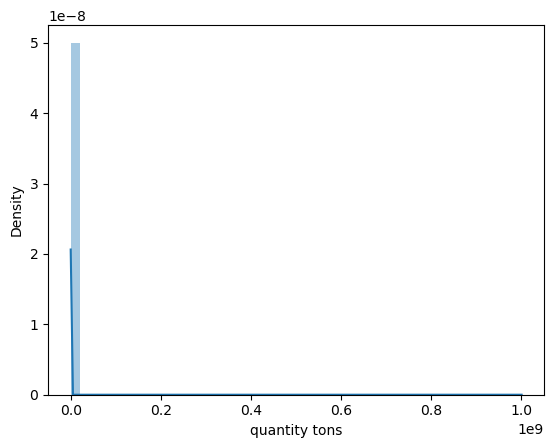

Skewness : 424.64990532133237


In [192]:
# skewness of quantity tons feature

sns.distplot(df['quantity tons'])
plt.show()
print('Skewness :',df['quantity tons'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


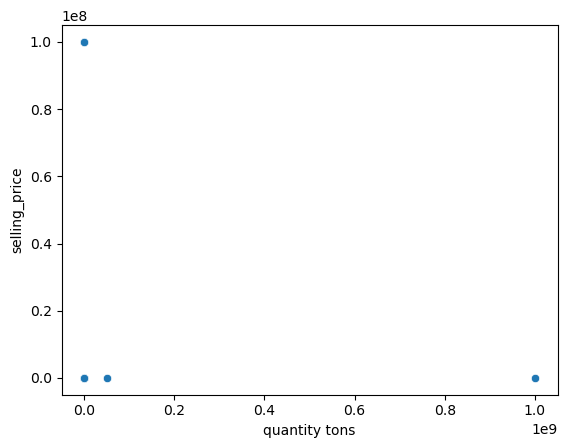

In [193]:
sns.scatterplot(df['quantity tons'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


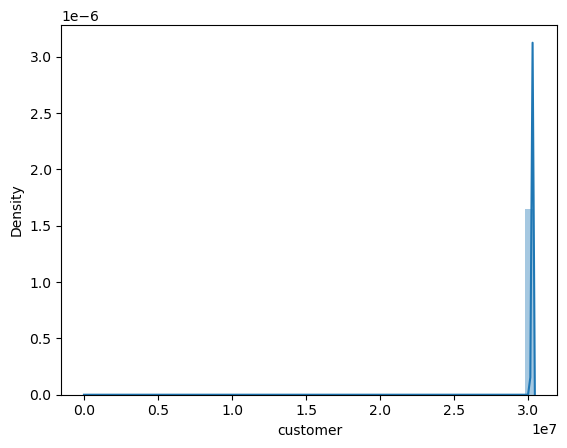

Skewness : -149.08849775548512


In [194]:
# skewness of Customer feature

sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


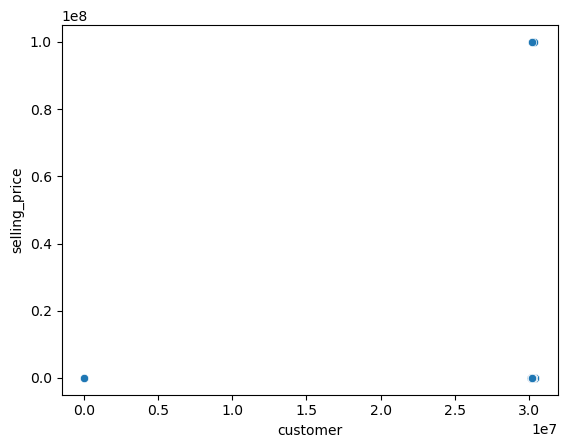

In [195]:
sns.scatterplot(df['customer'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


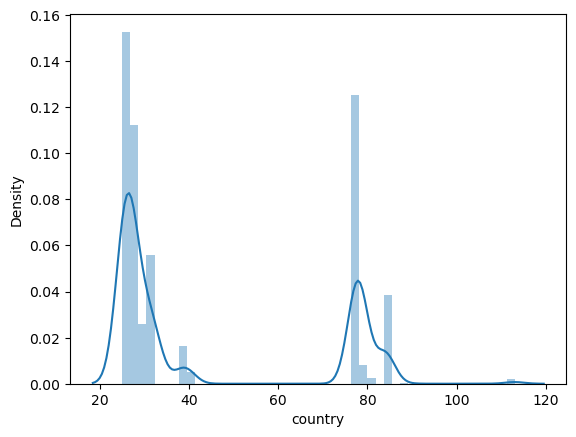

Skewness : 0.7535909197330176


In [196]:
#skewness of Country feature

sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


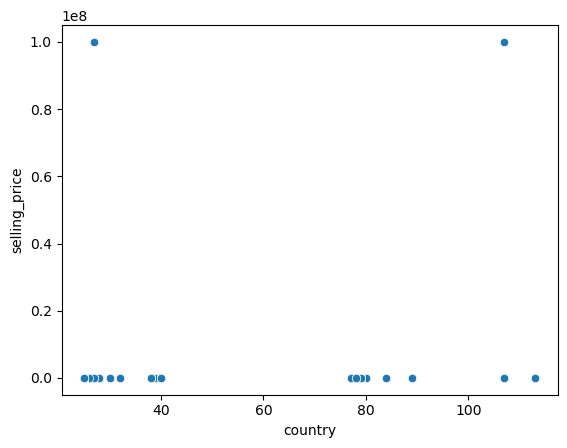

In [197]:
sns.scatterplot(df['country'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


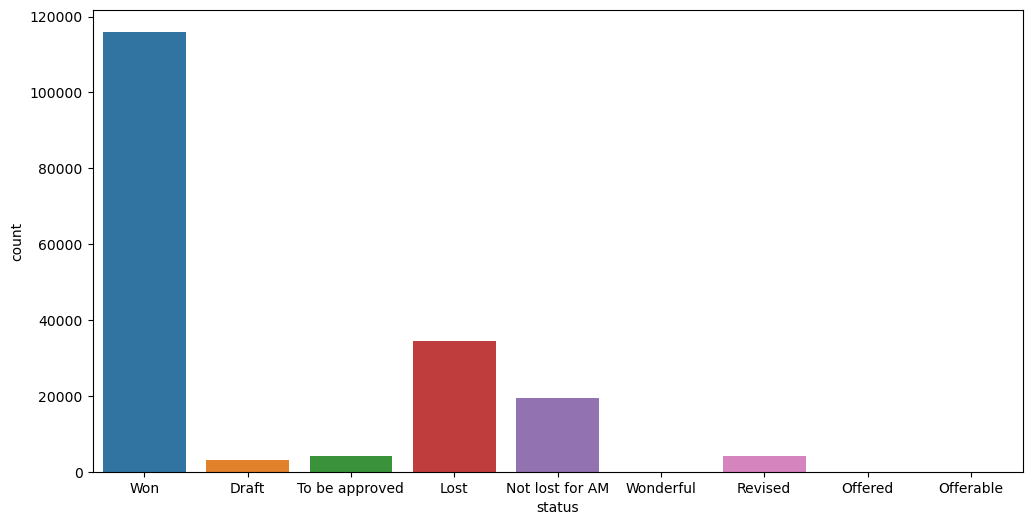

In [198]:
# 4. Status
plt.figure(figsize=(12,6))
sns.countplot(df['status'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


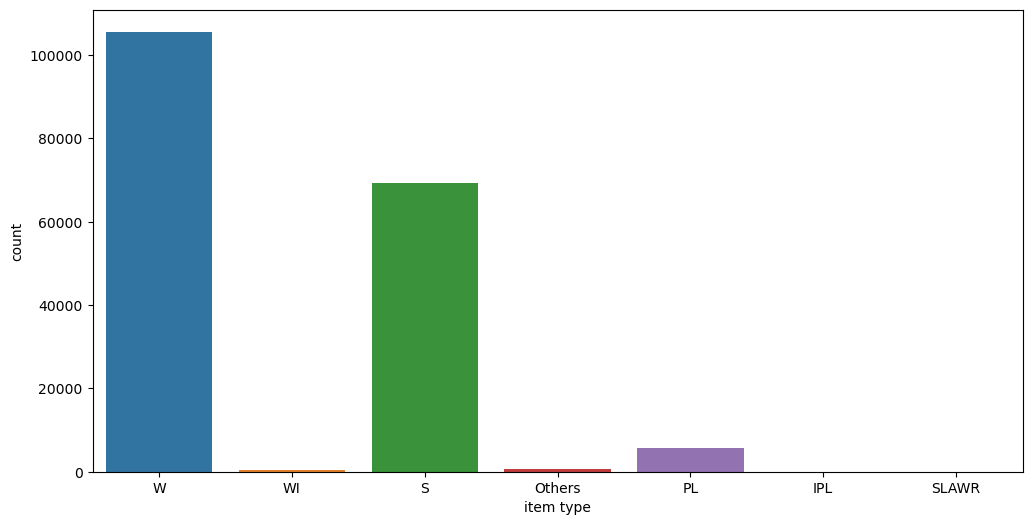

In [199]:
# 5. Item Type
plt.figure(figsize=(12,6))
sns.countplot(df['item type'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


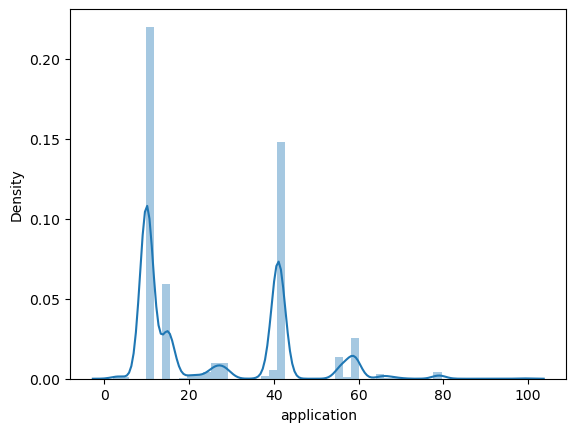

Skewness : 0.7243122177332125


In [200]:
#skewness of Application feature

sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


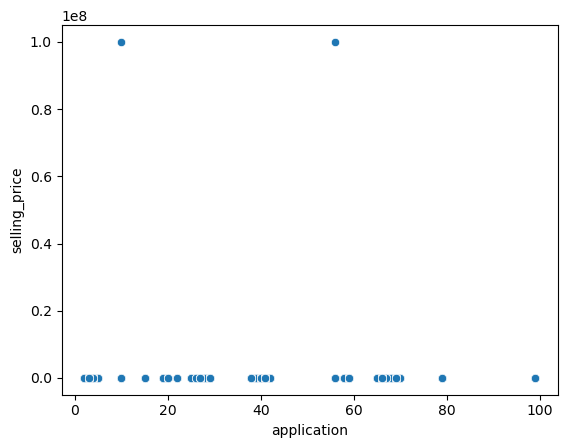

In [201]:
sns.scatterplot(df['application'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


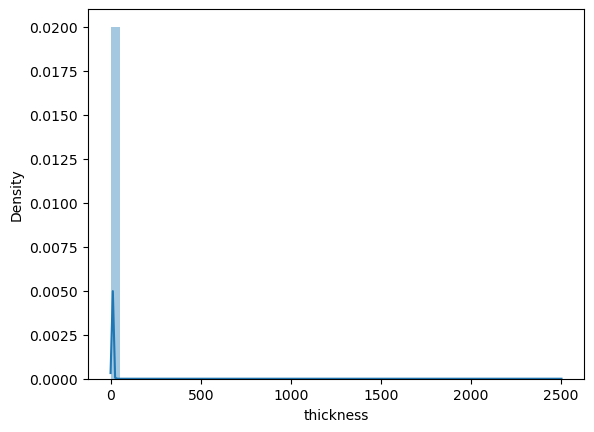

Skewness : 303.4764461273453


In [202]:
#skewness of Thickness feature

sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


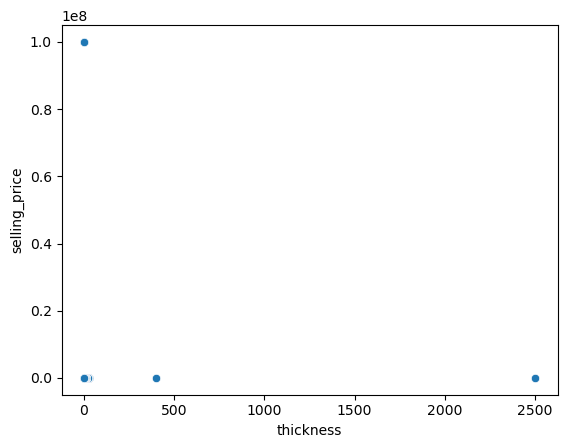

In [203]:
sns.scatterplot(df['thickness'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


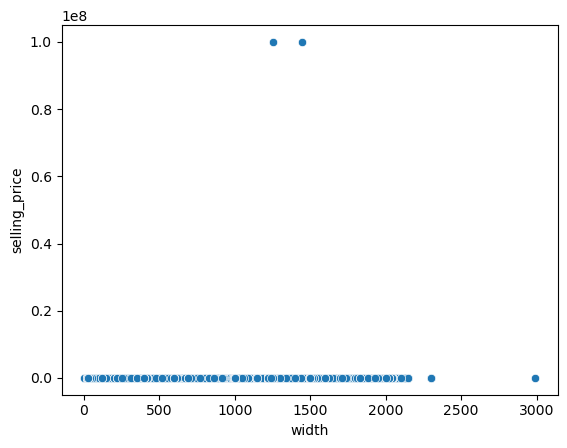

In [204]:
sns.scatterplot(df['width'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


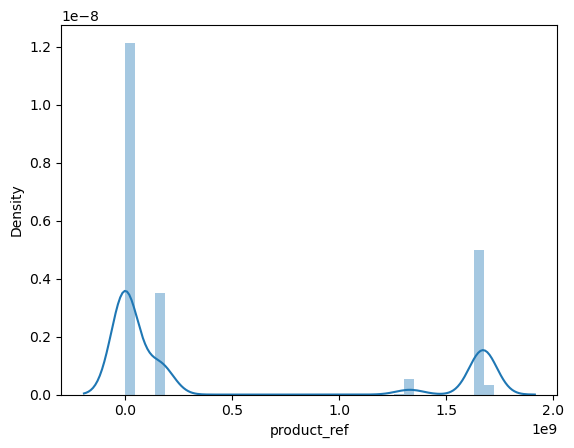

Skewness : 1.0150099676994326


In [205]:
#skewness of Product Reference feature

sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


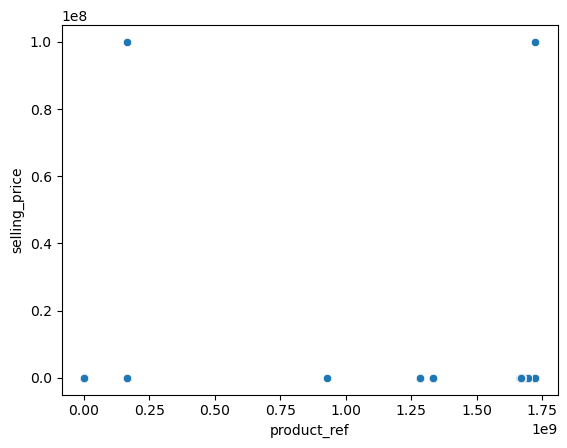

In [206]:
sns.scatterplot(df['product_ref'],df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


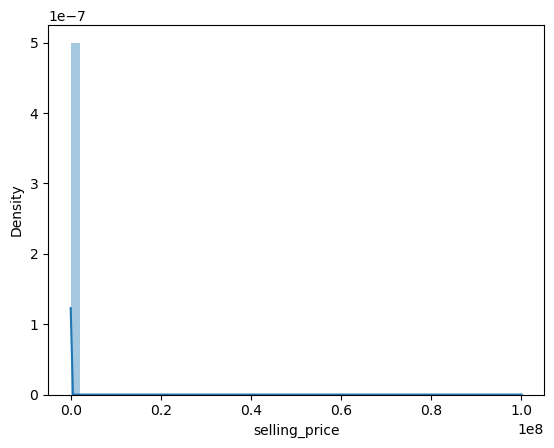

In [207]:
sns.distplot(df['selling_price'])
plt.show()

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181638 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181636 non-null  datetime64[ns]
 1   quantity tons  181638 non-null  float64       
 2   customer       181638 non-null  float64       
 3   country        181638 non-null  float64       
 4   status         181638 non-null  object        
 5   item type      181638 non-null  object        
 6   application    181638 non-null  float64       
 7   thickness      181638 non-null  float64       
 8   width          181638 non-null  float64       
 9   product_ref    181638 non-null  int64         
 10  delivery date  181636 non-null  datetime64[ns]
 11  selling_price  181638 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(2)
memory usage: 18.0+ MB


In [209]:
df.drop(columns=['item_date','delivery date'],inplace=True)

In [210]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


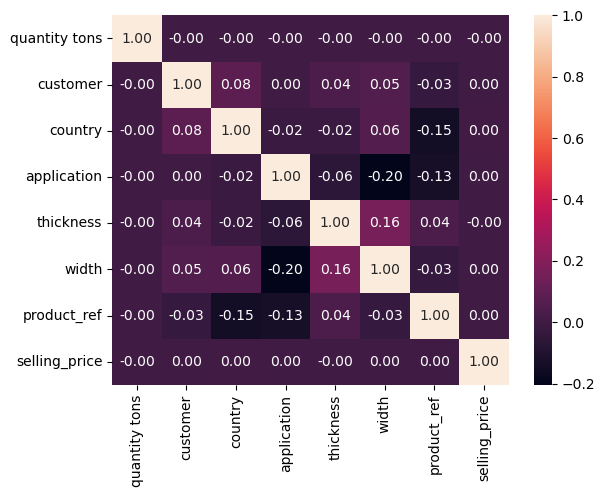

In [211]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

### Treat the Outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


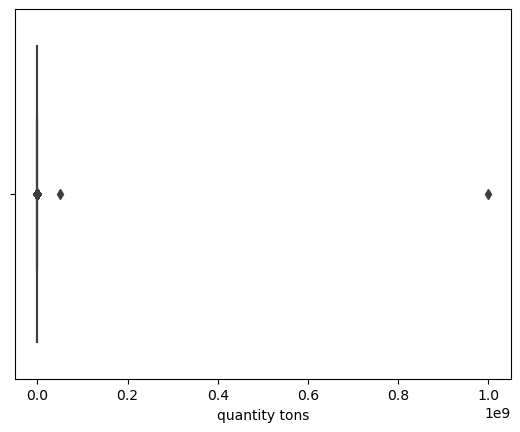

In [212]:
sns.boxplot(df['quantity tons'])
plt.show()

In [213]:
# quantity tons
df['quantity tons']=df['quantity tons'].fillna(3.413260820573159)
qrt1=np.quantile(df['quantity tons'],q=0.25)
median=df['quantity tons'].median()
qrt3=np.quantile(df['quantity tons'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)

Quartile 1 : 10.968678409999999
Median     : 30.363266375
Quartile 3 : 67.161414615
Lowerbound : -73.3204258975
Upperbound : 151.4505189225


In [214]:
outliers=[]
for i in df['quantity tons']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['quantity tons']=outliers

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


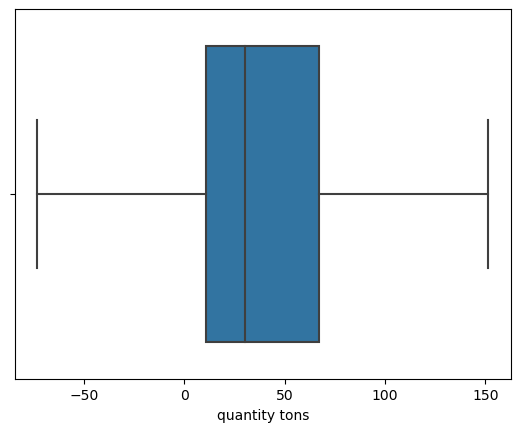

In [215]:
sns.boxplot(df['quantity tons'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


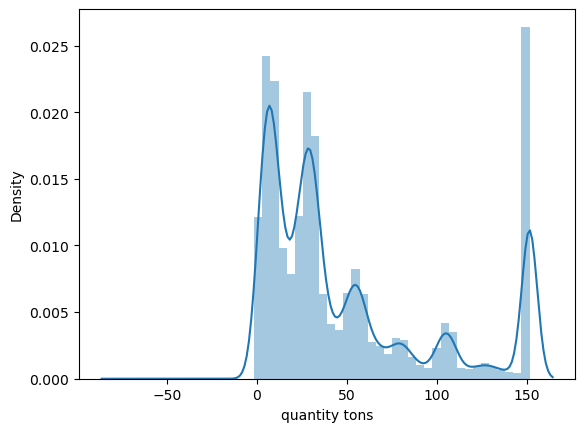

Skewness : 1.1216567758562528


In [216]:
sns.distplot(df['quantity tons'])
plt.show()
print('Skewness :',df['quantity tons'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='customer'>

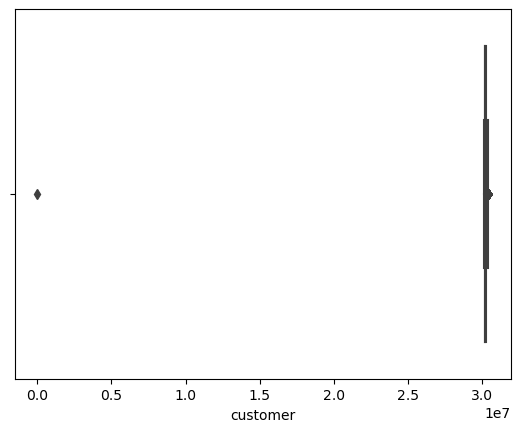

In [217]:
# customer
sns.boxplot(df['customer'])

In [218]:
qrt1=np.quantile(df['customer'],q=0.25)
median=df['customer'].median()
qrt3=np.quantile(df['customer'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['customer']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['customer']=outliers

Quartile 1 : 30196884.0
Median     : 30205242.0
Quartile 3 : 30280416.0
Lowerbound : 30071586.0
Upperbound : 30405714.0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


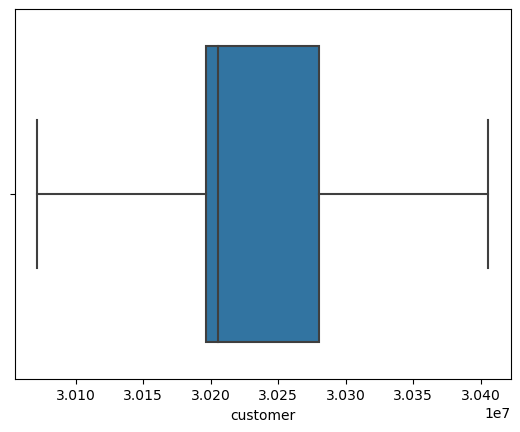

In [219]:
sns.boxplot(df['customer'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


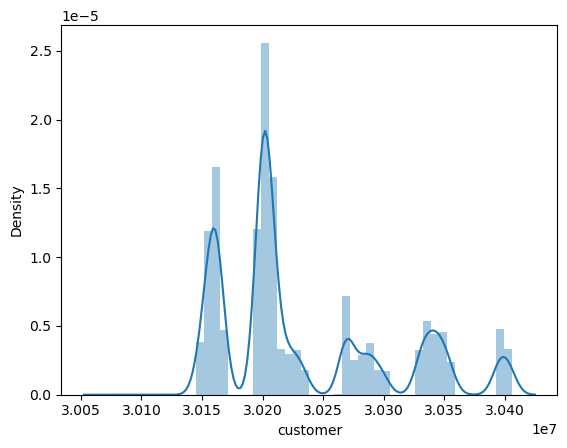

Skewness : 0.9047427587165121


In [220]:
sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


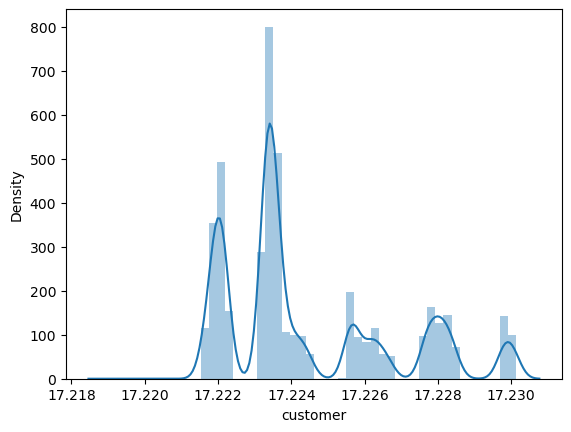

Skewness : 0.9016673535353062


In [221]:
df['customer']=np.log(df['customer'])
sns.distplot(df['customer'])
plt.show()
print('Skewness :',df['customer'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


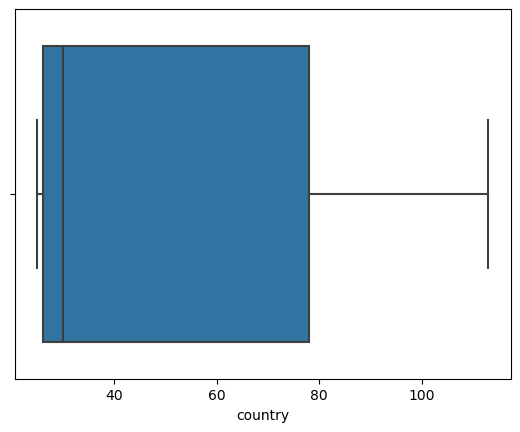

In [222]:
# country

sns.boxplot(df['country'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


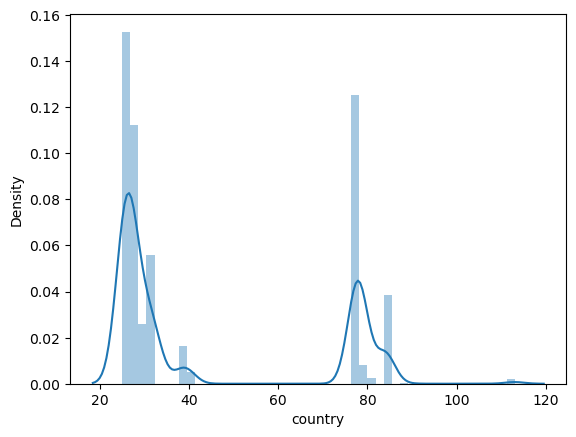

Skewness : 0.7535909197330176


In [223]:
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


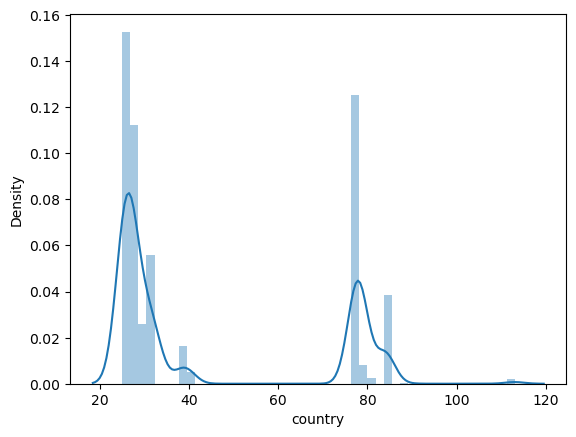

Skewness : 0.6590225770371265


In [224]:
df['country1']=np.log(df['country'])
sns.distplot(df['country'])
plt.show()
print('Skewness :',df['country1'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


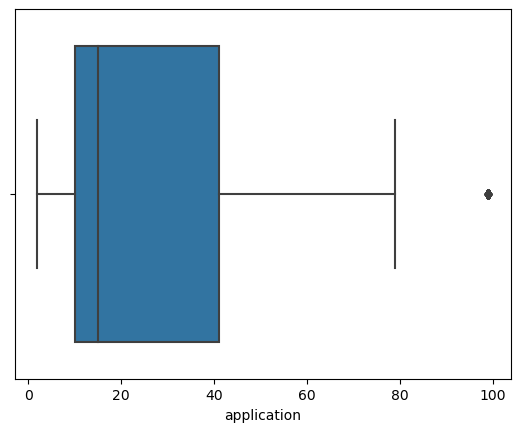

In [225]:
# application

sns.boxplot(df['application'])
plt.show()

In [226]:
qrt1=np.quantile(df['application'],q=0.25)
median=df['application'].median()
qrt3=np.quantile(df['application'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['application']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['application']=outliers

Quartile 1 : 10.0
Median     : 15.0
Quartile 3 : 41.0
Lowerbound : -36.5
Upperbound : 87.5


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


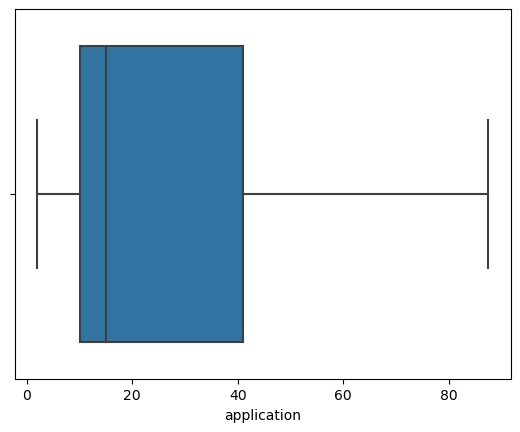

In [227]:
sns.boxplot(df['application'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


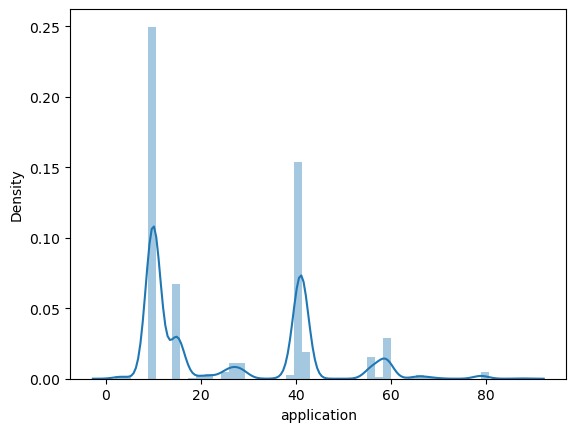

Skewness : 0.7073511951360936


In [228]:
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


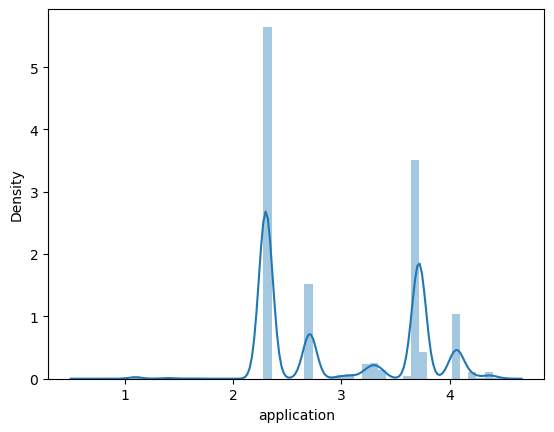

Skewness : 0.1938105793424309


In [229]:
df['application']=np.log(df['application'])
sns.distplot(df['application'])
plt.show()
print('Skewness :',df['application'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


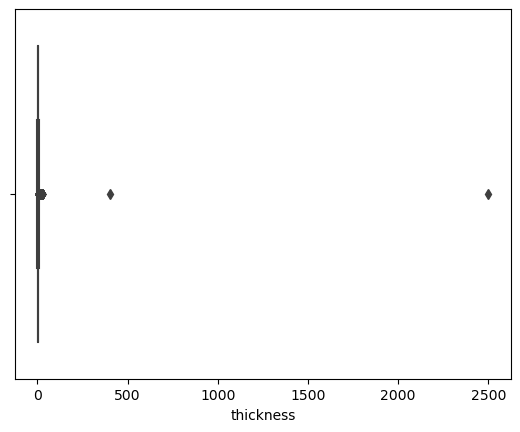

In [230]:
# thickness

sns.boxplot(df['thickness'])
plt.show()

In [231]:
qrt1=np.quantile(df['thickness'],q=0.25)
median=df['thickness'].median()
qrt3=np.quantile(df['thickness'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['thickness']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['thickness']=outliers

Quartile 1 : 0.7
Median     : 1.5
Quartile 3 : 3.0
Lowerbound : -2.75
Upperbound : 6.449999999999999


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


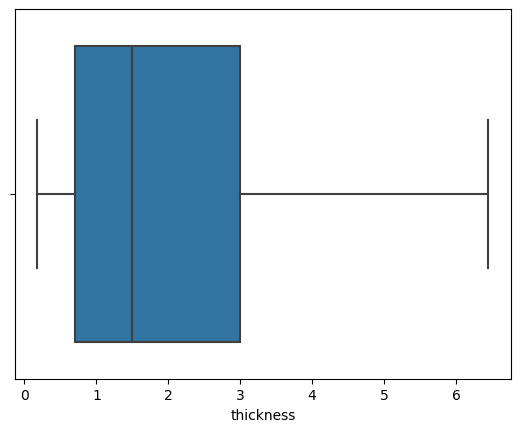

In [232]:
sns.boxplot(df['thickness'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


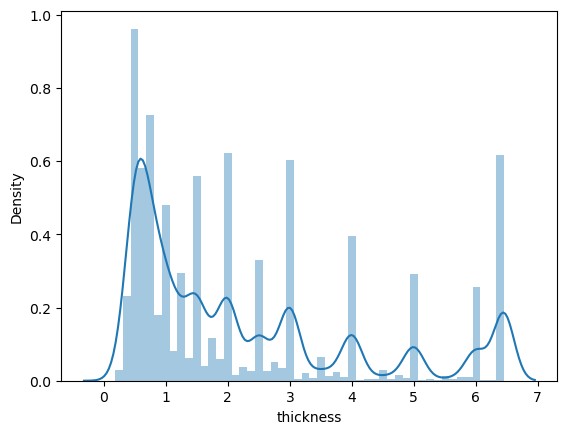

Skewness : 1.0613762337146269


In [233]:
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


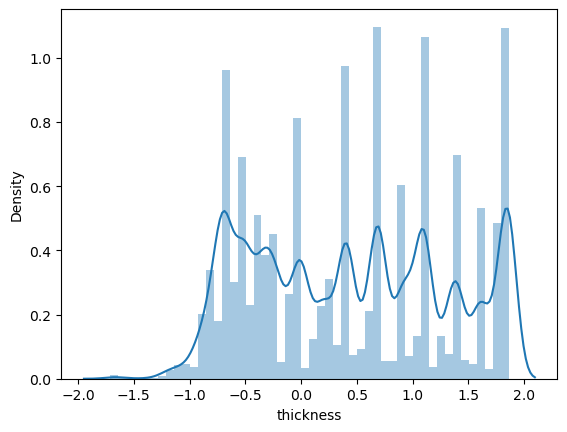

Skewness : 0.1011168748412259


In [234]:
df['thickness']=np.log(df['thickness'])
sns.distplot(df['thickness'])
plt.show()
print('Skewness :',df['thickness'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


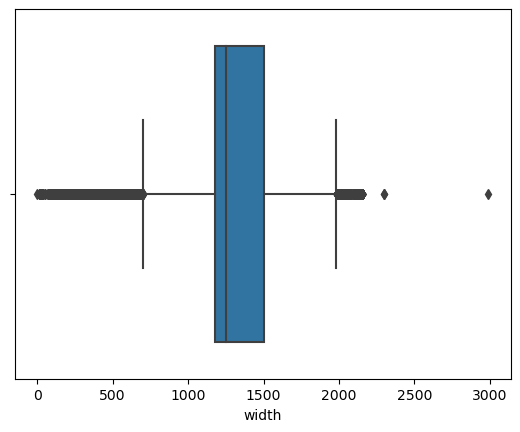

In [235]:
# width

sns.boxplot(df['width'])
plt.show()

In [236]:
qrt1=np.quantile(df['width'],q=0.25)
median=df['width'].median()
qrt3=np.quantile(df['width'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['width']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['width']=outliers

Quartile 1 : 1180.0
Median     : 1250.0
Quartile 3 : 1500.0
Lowerbound : 700.0
Upperbound : 1980.0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


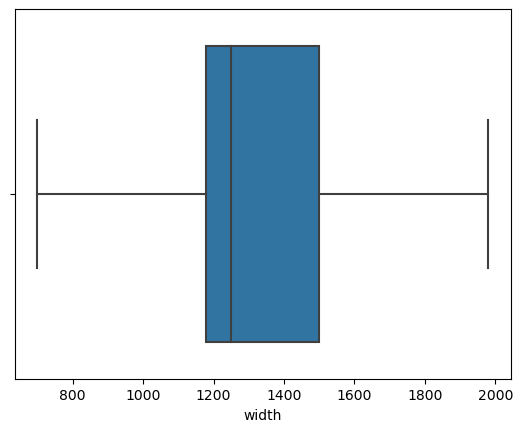

In [237]:
sns.boxplot(df['width'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


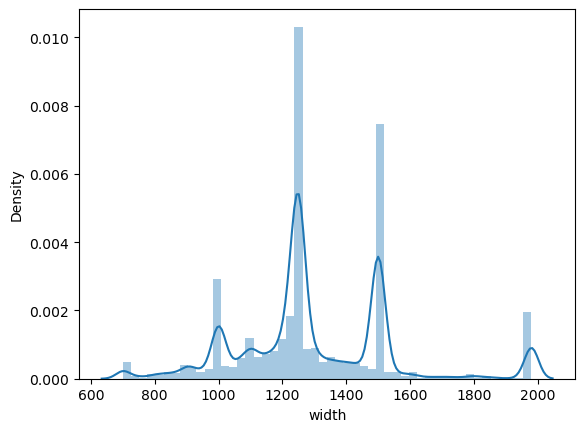

Skewness : 0.6679623562773281


In [238]:
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


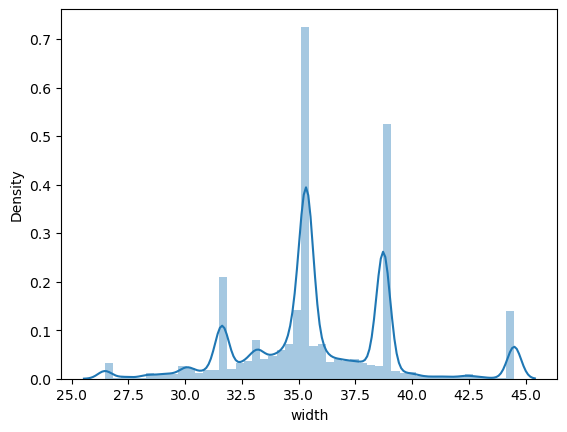

Skewness : 0.2767617664125403


In [239]:
df['width']=np.sqrt(df['width'])
sns.distplot(df['width'])
plt.show()
print('Skewness :',df['width'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


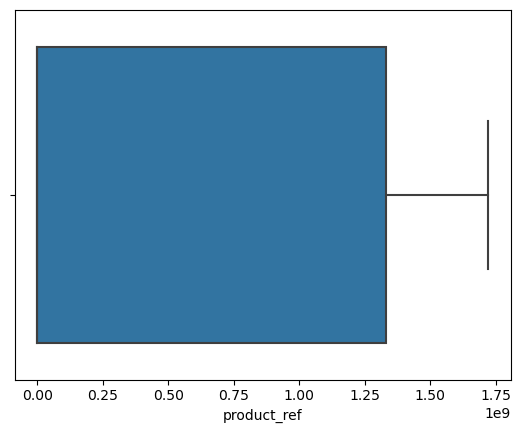

In [240]:
# product_ref

sns.boxplot(df['product_ref'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


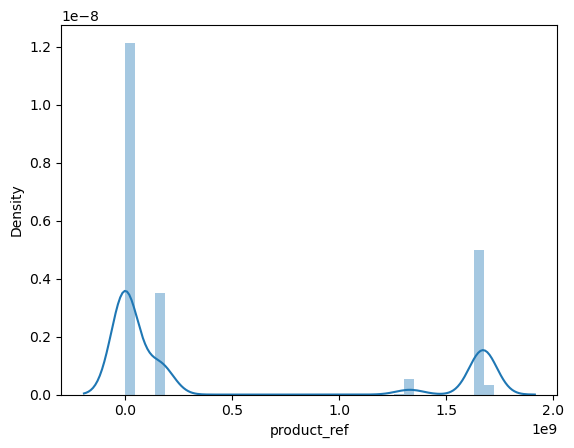

Skewness : 1.0150099676994326


In [241]:
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref'].skew())

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


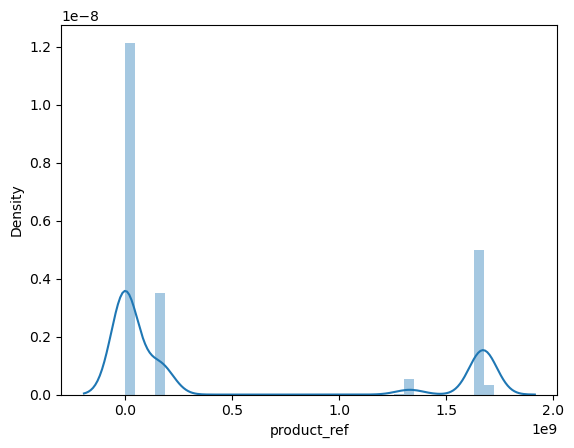

Skewness : 0.3806094273884239


In [242]:
df['product_ref1']=np.log(df['product_ref'])
sns.distplot(df['product_ref'])
plt.show()
print('Skewness :',df['product_ref1'].skew())

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


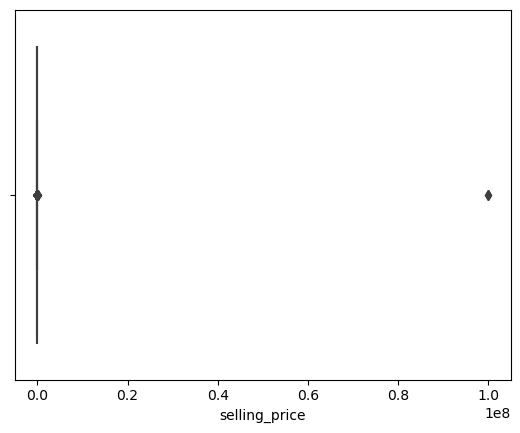

In [243]:
# selling price
sns.boxplot(df['selling_price'])
plt.show()

In [244]:
qrt1=np.quantile(df['selling_price'],q=0.25)
median=df['selling_price'].median()
qrt3=np.quantile(df['selling_price'],q=0.75)
iqr=qrt3-qrt1
lowb=qrt1-1.5*iqr
uppb=qrt3+1.5*iqr
print('Quartile 1 :',qrt1)
print('Median     :',median)
print('Quartile 3 :',qrt3)
print('Lowerbound :',lowb)
print('Upperbound :',uppb)
outliers=[]
for i in df['selling_price']:
    if i<lowb:
        outliers.append(lowb)
    elif i>uppb:
        outliers.append(uppb)
    else:
        outliers.append(i)
df['selling_price']=outliers

Quartile 1 : 669.0
Median     : 812.0
Quartile 3 : 953.0
Lowerbound : 243.0
Upperbound : 1379.0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


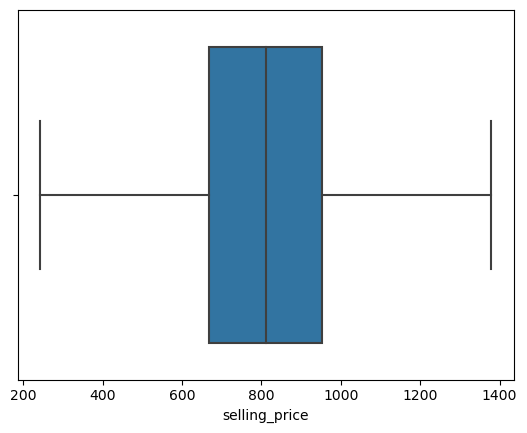

In [245]:
sns.boxplot(df['selling_price'])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


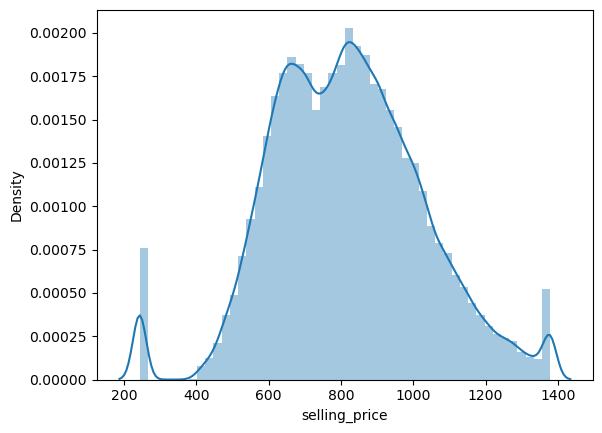

Skewness : 0.1379918523197989


In [246]:
sns.distplot(df['selling_price'])
plt.show()
print('Skewness :',df['selling_price'].skew())

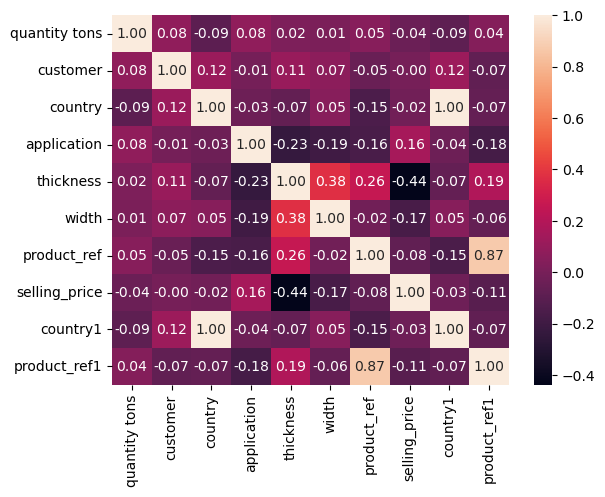

In [247]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

### Encoding the Data

In [248]:
df=df[(df['status']=='Won') | (df['status']=='Lost')]

In [249]:
# Status
df['status']=df['status'].map({'Won':1,'Lost':0})
# Item Type
df['item type']=df['item type'].map({'W':0,'WI':1,'S':2,'Others':3,'PL':4,'IPL':5,'SLAWR':6})


In [250]:
df.drop(columns=['country1','product_ref1'],inplace=True)

In [251]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,17.221905,28.0,1,0,2.302585,0.693147,38.729833,1670798778,854.00
1,151.450519,17.223450,25.0,1,0,3.713572,-0.223144,34.785054,1668701718,1047.00
2,151.450519,17.221827,30.0,1,1,3.332205,-0.967584,30.854497,628377,644.33
3,151.450519,17.228293,32.0,1,2,4.077537,0.832909,36.290495,1668701718,768.00
4,151.450519,17.223735,28.0,1,0,2.302585,1.386294,44.497191,640665,577.00


In [252]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(df[['country']])
X_ohe = ohe.fit_transform(df[['country']]).toarray()
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(df[['product_ref']])
X_be = ohe2.fit_transform(df[['product_ref']]).toarray()

In [253]:
x= np.concatenate((df[['quantity tons','customer','status','item type','application','thickness','width']].values, X_ohe, X_be), axis=1)

In [254]:
#df5=pd.DataFrame(ohe2.toarray())
#df6=pd.DataFrame(ohe1.toarray())

### Split the Data

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [256]:
#x=df[['quantity tons','customer','country','status','item type','application','thickness','width','product_ref']]
#df7=pd.DataFrame(df,columns=['quantity tons','customer','status','item type','application','thickness','width'])
#x=pd.concat((df7,df5,df6),axis=1)
y=df['selling_price']

In [257]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Scaling

In [258]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

### Model Creation

### Regression Problem

In [259]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesRegressor,ExtraTreesClassifier
from xgboost import XGBRegressor,XGBClassifier
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,precision_score,recall_score,precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import cross_val_score,RandomizedSearchCV

In [260]:
# Linear Regression 

lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))


R2 Score : -2.7444736267923203e+17
MSE : 1.0517599614203326e+22
MAE : 482743174.2493315


In [261]:
# DT 

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.40870492263120684
MSE : 22660.100708939874
MAE : 104.23875481683564


In [262]:
# Random Forest 

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.6419321361265122
MSE : 13722.173863029748
MAE : 88.61609371607854


In [263]:
# Gradient Boost 

gb=GradientBoostingRegressor(n_estimators=150)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.4933632362063809
MSE : 19415.75455270431
MAE : 119.43609861240772


In [264]:
# XGBoost 

xbg=XGBRegressor()
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.6034165896677496
MSE : 15198.198600964559
MAE : 102.59151233865471


In [265]:
# Extra Tree

extra_tree_model = ExtraTreesRegressor(n_estimators = 100,
          criterion ='squared_error', max_features = "auto")
extra_tree_model.fit(x_train,y_train)
y_pred=extra_tree_model.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.5902312929125977
MSE : 15703.496486545719
MAE : 90.48735874806997


### Hyper Prameter Tuning

In [266]:
# XGBoost

xbg=XGBRegressor(max_depth=8,n_estimators=100)
xbg.fit(x_train,y_train)
y_pred=xbg.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.6406412184036252
MSE : 13771.645483422304
MAE : 95.57100356589096


In [267]:
'''
{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}
'''

"\n{'n_estimators': 200,\n 'min_samples_leaf': 2,\n 'max_features': 'log2',\n 'max_depth': 20}\n"

In [268]:
rf=RandomForestRegressor(n_estimators=200,max_depth=8)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('R2 Score :',r2_score(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('MAE :',mean_absolute_error(y_test,y_pred))

R2 Score : 0.4944401139743645
MSE : 19374.485549109162
MAE : 118.45726277578538


# Predicted price


In [269]:
new_sample = np.array([[151.450519,np.log(30156308.0),1.0,2.0,np.log(2.3),np.log(0.69),np.sqrt(38.723),28.0,1670798778]])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = rf.predict(new_sample1)
print('Predicted selling price:',new_pred)

D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Predicted selling price: [845.92801002]


### Pickle

In [270]:
import pickle

In [271]:
model=pickle.dump(rf,open('model1.pkl','wb'))
scale=pickle.dump(scaler,open('scale.pkl','wb'))

In [272]:
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [273]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,17.221905,28.0,1,0,2.302585,0.693147,38.729833,1670798778,854.00
1,151.450519,17.223450,25.0,1,0,3.713572,-0.223144,34.785054,1668701718,1047.00
2,151.450519,17.221827,30.0,1,1,3.332205,-0.967584,30.854497,628377,644.33
3,151.450519,17.228293,32.0,1,2,4.077537,0.832909,36.290495,1668701718,768.00
4,151.450519,17.223735,28.0,1,0,2.302585,1.386294,44.497191,640665,577.00


### Classification Problem

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


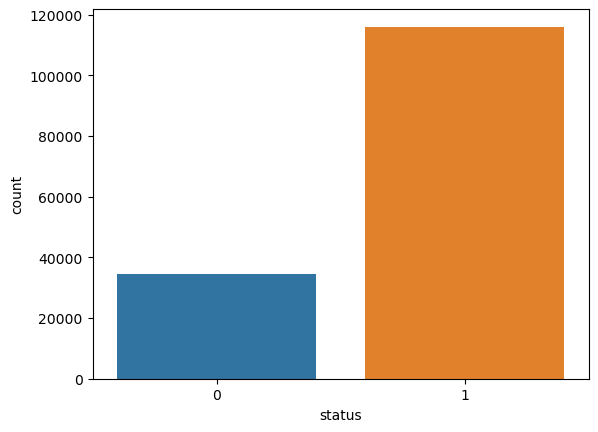

In [274]:
# It's imbalance dataset
sns.countplot(df['status'])
plt.show()

In [275]:
df1=df.copy()

In [276]:
x=df1.drop(columns=['status'])
y=df1['status']

In [277]:
y.value_counts()

1    116008
0     34432
Name: status, dtype: int64

# Over Sampling

In [278]:
from imblearn.over_sampling import SMOTE

In [279]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


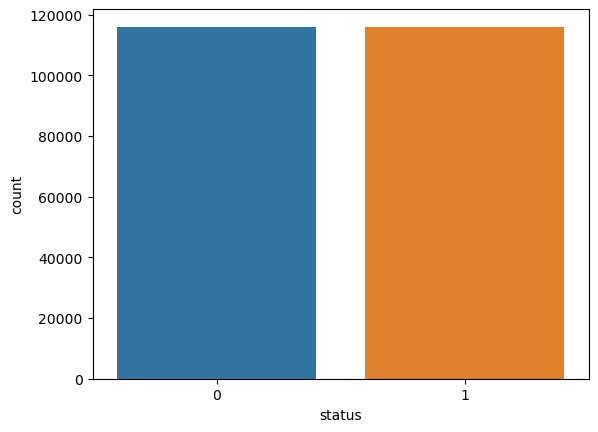

In [281]:
sns.countplot(y_sm)
plt.show()

In [282]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [283]:
# Logistic Regression 

lr2=LogisticRegression()
lr2.fit(x_train,y_train)
y_pred=lr2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.6648149781030478
Precision : 0.6812951807228915
Recall : 0.6491132411180623


In [286]:
# Decision Tree 

dt2=DecisionTreeClassifier()
dt2.fit(x_train,y_train)
y_pred=dt2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9336599481427365
Precision : 0.9321243671519693
Recall : 0.9352005969121276


In [287]:
# Random Forest  

rf2=RandomForestClassifier()
rf2.fit(x_train,y_train)
y_pred=rf2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.9558505266195354
Precision : 0.9611478644382544
Recall : 0.9506112609768697


In [288]:
# Gradient Boost 

gb2=GradientBoostingClassifier()
gb2.fit(x_train,y_train)
y_pred=gb2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.8044560185185184
Precision : 0.8111688160121375
Recall : 0.7978534121563451


In [289]:
# Adaboost 

adb2=AdaBoostClassifier()
adb2.fit(x_train,y_train)
y_pred=adb2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.7627724135952139
Precision : 0.7626739348730455
Recall : 0.7628709177523962


In [290]:
# XGBoost 

xgb2=XGBClassifier()
xgb2.fit(x_train,y_train)
y_pred=xgb2.predict(x_test)
print('F1 Score :',f1_score(y_test,y_pred))
print('Precision :',precision_score(y_test,y_pred))
print('Recall :',recall_score(y_test,y_pred))

F1 Score : 0.915824050271351
Precision : 0.9115539887416843
Recall : 0.9201343052287206


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


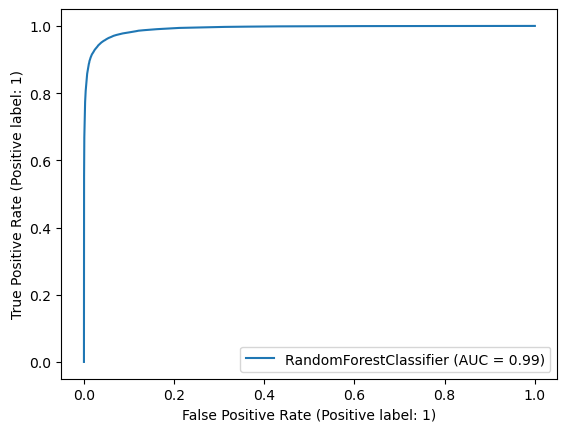

In [291]:
# roc curve for rf2
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(rf2, x_test, y_test)

In [292]:
roc_auc_score(y_test, rf2.predict_proba(x_test)[:,1])

0.991812395297757

In [293]:
pr=np.array([[110.617479,17.223935,27.000000,2,2.302585,0.000000,36.124784,1693867550,727.000000]])

In [294]:
predict=rf2.predict(pr)[0]
if predict==1:
    print("The Status is: WON")
else:
    print("The Status is: Lost")
    

The Status is: WON


In [295]:
#pickle file for classification
model=pickle.dump(rf2,open('model2.pkl','wb'))